In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
ecom = pd.read_csv(r'C:\Users\anton\OneDrive\Área de Trabalho\Repositórios\RFV analysis in Python\data.csv', encoding = 'unicode_escape')
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Number of rows and columns
ecom.shape

(541909, 8)

In [4]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Change date column data type from object to datetime

ecom['InvoiceDate'] = pd.to_datetime(ecom['InvoiceDate'])

In [6]:
# How much each cliente spent

ecom['InvoiceRevenue'] = ecom['Quantity']*ecom['UnitPrice']

In [7]:
ecom

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [8]:
# Some Unitprices and quantities are negative. Filter only positive values.

ecom = ecom.query('UnitPrice > 0 and Quantity > 0')
ecom.shape

(530104, 9)

In [9]:
# Quantis and ranking

ecom['Quantiles'] = pd.cut(ecom['InvoiceRevenue'], 5) #divide the column in 5 equal parts and locates each observation
ecom['Percentile_Rank'] = ecom['InvoiceRevenue'].rank(pct=True) #Order the column. pct=True orders it in percentage and it means "higher than x percentage of the total" 
ecom['Rank'] = ecom['InvoiceRevenue'].rank() #same as above, but returns the values in numbers, as rank 

In [10]:
# create another dataframe with recency. The dataframe groups all 4338 unique customers and bring the last InvoiceDate (last time he purchased)

df_recency = (
    ecom[['InvoiceDate', 'CustomerID']]
    .groupby('CustomerID')['InvoiceDate']
    .agg('max')
    .reset_index()
)

df_recency

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4333,18280.0,2011-03-07 09:52:00
4334,18281.0,2011-06-12 10:53:00
4335,18282.0,2011-12-02 11:43:00
4336,18283.0,2011-12-06 12:02:00


In [11]:
cur_time = df_recency['InvoiceDate'].max()  #highest date in the dataframe

# this function takes the highest datetime in the dataframe and a specific datetime and calculates the difference in months  
def month_diff(cur_time, datetime_val):
    return 12 * (cur_time.year - datetime_val.year) + (cur_time.month-datetime_val.month)


# apply the month_diff function to each row in the "InvoiceDate" column to create a new column with recency
df_recency['Recency'] = df_recency['InvoiceDate'].apply(lambda datetime_val: month_diff(cur_time, datetime_val))

In [12]:
df_recency

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,11
1,12347.0,2011-12-07 15:52:00,0
2,12348.0,2011-09-25 13:13:00,3
3,12349.0,2011-11-21 09:51:00,1
4,12350.0,2011-02-02 16:01:00,10
...,...,...,...
4333,18280.0,2011-03-07 09:52:00,9
4334,18281.0,2011-06-12 10:53:00,6
4335,18282.0,2011-12-02 11:43:00,0
4336,18283.0,2011-12-06 12:02:00,0


In [13]:
# Summary 
df_recency.describe()

,CustomerID,InvoiceDate,Recency
count,4338.000000,4338,4338.000000
mean,15300.408022,2011-09-08 11:38:59.045643008,3.222453
min,12346.000000,2010-12-01 09:53:00,0.000000
25%,13813.250000,2011-07-20 19:18:00,1.000000
50%,15299.500000,2011-10-20 10:40:30,2.000000
75%,16778.750000,2011-11-22 11:05:45,5.000000
max,18287.000000,2011-12-09 12:50:00,12.000000
std,1721.808492,NaN,3.284536


<Axes: xlabel='Recency'>

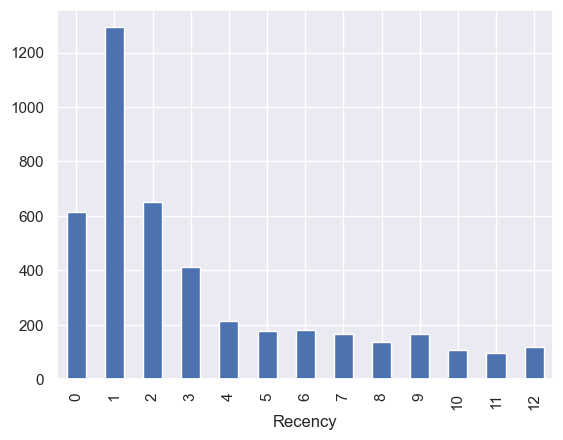

In [14]:
# Recency distribution

df_recency['Recency'].value_counts().sort_index().plot.bar()

In [15]:
# Drop InvoiceDate column as it is no longer necessary

df_recency = df_recency.drop('InvoiceDate', axis=1)
df_recency

,CustomerID,Recency
0,12346.0,11
1,12347.0,0
2,12348.0,3
3,12349.0,1
4,12350.0,10
...,...,...
4333,18280.0,9
4334,18281.0,6
4335,18282.0,0
4336,18283.0,0


In [16]:
# Find Frequency (count of invoices) and Value (average spending, mean of Invoice Revenue)

df_frequency_value = (ecom.groupby('CustomerID')[['InvoiceNo', 'InvoiceRevenue']].agg({'InvoiceNo': "count", 'InvoiceRevenue': "mean"}).reset_index())
df_frequency_value

,CustomerID,InvoiceNo,InvoiceRevenue
0,12346.0,1,77183.600000
1,12347.0,182,23.681319
2,12348.0,31,57.975484
3,12349.0,73,24.076027
4,12350.0,17,19.670588
...,...,...,...
4333,18280.0,10,18.060000
4334,18281.0,7,11.545714
4335,18282.0,12,14.837500
4336,18283.0,756,2.771005


In [17]:
# Rename columns

df_frequency_value = df_frequency_value.rename(
            columns={
                "InvoiceNo": "Frequency",
                "InvoiceRevenue": "Monetary"
            }
)

In [18]:
df_frequency_value

,CustomerID,Frequency,Monetary
0,12346.0,1,77183.600000
1,12347.0,182,23.681319
2,12348.0,31,57.975484
3,12349.0,73,24.076027
4,12350.0,17,19.670588
...,...,...,...
4333,18280.0,10,18.060000
4334,18281.0,7,11.545714
4335,18282.0,12,14.837500
4336,18283.0,756,2.771005


In [19]:
# round values

df_frequency_value['Monetary'] = df_frequency_value['Monetary'].round(2)
df_frequency_value.head()

,CustomerID,Frequency,Monetary
0,12346.0,1,77183.60
1,12347.0,182,23.68
2,12348.0,31,57.98
3,12349.0,73,24.08
4,12350.0,17,19.67


In [20]:
# Join dataframe df_recency with df_frequency_value to get the RFV for all customers

df_rfv = df_recency.merge(df_frequency_value, on = 'CustomerID', how='left')
df_rfv = df_rfv.fillna(0)
df_rfv

,CustomerID,Recency,Frequency,Monetary
0,12346.0,11,1,77183.60
1,12347.0,0,182,23.68
2,12348.0,3,31,57.98
3,12349.0,1,73,24.08
4,12350.0,10,17,19.67
...,...,...,...,...
4333,18280.0,9,10,18.06
4334,18281.0,6,7,11.55
4335,18282.0,0,12,14.84
4336,18283.0,0,756,2.77


In [21]:
# time to apply a cluster technique no segment the customers.

# Frequency and monetary value have very big difference scale, so I will apply a scaling treatment to make it fair.
from sklearn.preprocessing import StandardScaler

feature_cols = ['Recency', 'Frequency', 'Monetary'] #separate feature columns

standardized_data = df_rfv.copy() #create a copy of the dataframe

scaler = StandardScaler() #instantiate the scaler

scaler.fit(df_rfv[feature_cols]) #train the algorithm in the original data

standardized_features = scaler.transform(df_rfv[feature_cols]) # Apply the transformations
standardized_data[feature_cols] = standardized_features # alocate features in the copy dataframe

In [22]:
from sklearn.cluster import KMeans

# Train with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(standardized_data[feature_cols])

# assigns labels to individuals
df_rfv['Cluster'] = kmeans.labels_

df_rfv.head()


,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,11,1,77183.60,2
1,12347.0,0,182,23.68,0
2,12348.0,3,31,57.98,0
3,12349.0,1,73,24.08,0
4,12350.0,10,17,19.67,1


<Axes: xlabel='Cluster', ylabel='Recency'>

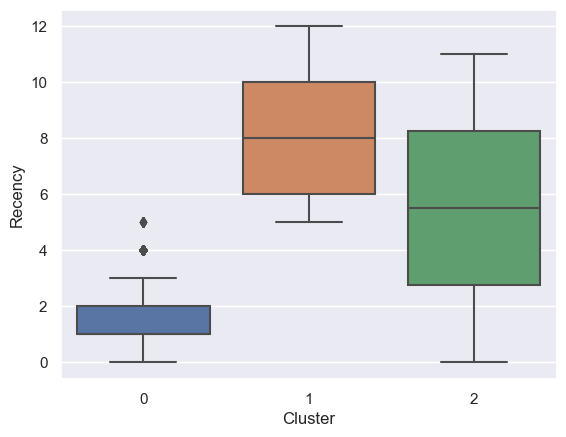

In [23]:
# investigate clusters behavior

sns.boxplot(x='Cluster', y='Recency', data=df_rfv)

<Axes: xlabel='Cluster', ylabel='Frequency'>

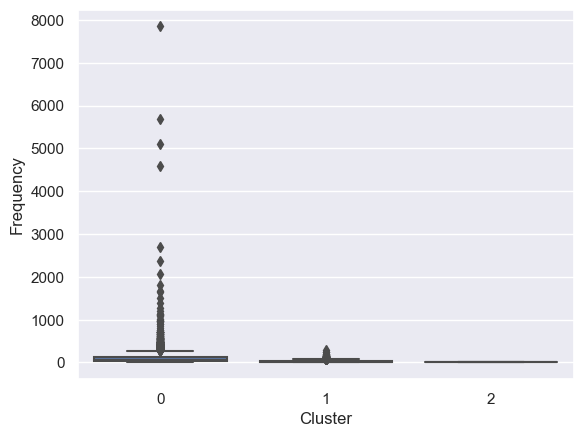

In [24]:
sns.boxplot(x='Cluster', y='Frequency', data=df_rfv)

<Axes: xlabel='Cluster', ylabel='Monetary'>

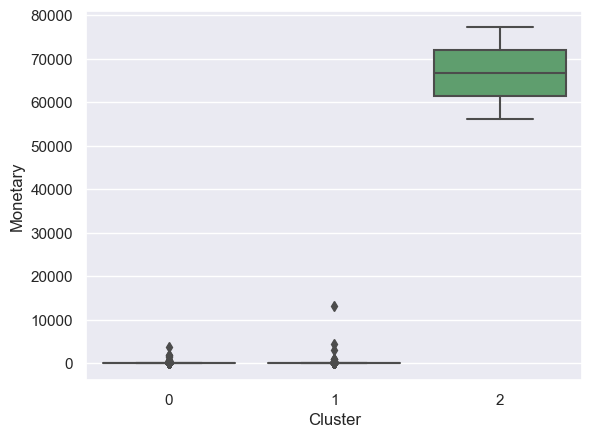

In [25]:
sns.boxplot(x='Cluster', y='Monetary', data=df_rfv)

In [26]:
# Cluster 2: high spending
# cluster 1: high recency
# cluster 0: high frequency

In [27]:
# Cluster general metrics

kmeans_metrics = (
    df_rfv.groupby("Cluster")
    [['CustomerID', 'Recency', 'Frequency', 'Monetary']]
    .agg(
        {
            "CustomerID": "nunique",
            "Recency": "mean",
            "Frequency": "mean",
            "Monetary": "mean"
    }
    )
    .reset_index()
)

# Rename

kmeans_metrics = kmeans_metrics.rename(columns={"customerID": "N_Buyers"})

# Order by recency
kmeans_metrics.sort_values(by='Recency', ascending=True)
kmeans_metrics


,Cluster,CustomerID,Recency,Frequency,Monetary
0,0,3194,1.481215,114.380401,32.510783
1,1,1142,8.088441,28.501751,51.947215
2,2,2,5.500000,2.000000,66670.550000


In [28]:
# rename cluster names

seg_map = ['Frequent Buyer', 'VIP client', 'Possible churn']

kmeans_metrics['Segment'] = seg_map
kmeans_metrics


,Cluster,CustomerID,Recency,Frequency,Monetary,Segment
0,0,3194,1.481215,114.380401,32.510783,Frequent Buyer
1,1,1142,8.088441,28.501751,51.947215,VIP client
2,2,2,5.500000,2.000000,66670.550000,Possible churn
